# UNIDAD 3 - PROYECTO: ML

## Nombre del alumno: Brenda Cortes Aguilar
## Número de control: 20120097

# PRESENTACIÓN DEL PROYECTO:
## El proyecto busca que el estudiante pueda utilizar técnicas de Machine Learning para realizar predicciones de un dataset de la vida real.
## En esta ocasión, el dataset es pequeño, por lo que se debe tener especial cuidado cuando se traten los datos y se seleccione el modelo.

# PARTE I: EDA.

## Paso 1. Carga y muestra.
### - Cargue el dataset llamado "cirrhosis.csv" en un dataframe, posteriormente muestre su información.

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.exceptions import FitFailedWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)

df = pd.read_csv('cirrhosis.csv')

In [2]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [3]:
df.tail()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,C,NaN,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

Se observar que el data set, tienen un total de 20 columnas, contiene tipos de dato, "Object", "Int" y "float" y un total de 418 registros, también se observa que más del 50% del data set, está representado por columnas numericas.

## Paso 2. Análisis estadístico.
### - De las columnas numéricas, muestre la información estadística relevante (promedio, cuartíles, desviación estándar y coeficiente de variación).


In [5]:
print(f"Descripción de la columna ID :")
print(df["ID"].describe())

Descripción de la columna ID :
count    418.000000
mean     209.500000
std      120.810458
min        1.000000
25%      105.250000
50%      209.500000
75%      313.750000
max      418.000000
Name: ID, dtype: float64


In [6]:
print(f"Descripción de la columna Age:")
print(df["Age"].describe())

Descripción de la columna Age:
count      418.000000
mean     18533.351675
std       3815.845055
min       9598.000000
25%      15644.500000
50%      18628.000000
75%      21272.500000
max      28650.000000
Name: Age, dtype: float64


In [7]:
print(f"Descripción de la columna Bilirubin:")
print(df["Bilirubin"].describe())

Descripción de la columna Bilirubin:
count    418.000000
mean       3.220813
std        4.407506
min        0.300000
25%        0.800000
50%        1.400000
75%        3.400000
max       28.000000
Name: Bilirubin, dtype: float64


In [8]:
print(f"Descripción de la columna Cholesterol:")
print(df["Cholesterol"].describe())

Descripción de la columna Cholesterol:
count     284.000000
mean      369.510563
std       231.944545
min       120.000000
25%       249.500000
50%       309.500000
75%       400.000000
max      1775.000000
Name: Cholesterol, dtype: float64


In [9]:
print(f"Descripción de la columna Albumin :")
print(df["Albumin"].describe())

Descripción de la columna Albumin :
count    418.000000
mean       3.497440
std        0.424972
min        1.960000
25%        3.242500
50%        3.530000
75%        3.770000
max        4.640000
Name: Albumin, dtype: float64


In [10]:
print(f"Descripción de la columna Copper :")
print(df["Copper"].describe())

Descripción de la columna Copper :
count    310.000000
mean      97.648387
std       85.613920
min        4.000000
25%       41.250000
50%       73.000000
75%      123.000000
max      588.000000
Name: Copper, dtype: float64


In [11]:
print(f"Descripción de la columna Alk_Phos :")
print(df["Alk_Phos"].describe())

Descripción de la columna Alk_Phos :
count      312.000000
mean      1982.655769
std       2140.388824
min        289.000000
25%        871.500000
50%       1259.000000
75%       1980.000000
max      13862.400000
Name: Alk_Phos, dtype: float64


In [12]:
print(f"Descripción de la columna SGOT :")
print(df["SGOT"].describe())

Descripción de la columna SGOT :
count    312.000000
mean     122.556346
std       56.699525
min       26.350000
25%       80.600000
50%      114.700000
75%      151.900000
max      457.250000
Name: SGOT, dtype: float64


In [13]:
print(f"Descripción de la columna Tryglicerides:")
print(df["Tryglicerides"].describe())

Descripción de la columna Tryglicerides:
count    282.000000
mean     124.702128
std       65.148639
min       33.000000
25%       84.250000
50%      108.000000
75%      151.000000
max      598.000000
Name: Tryglicerides, dtype: float64


In [14]:
print(f"Descripción de la columna Platelets:")
print(df["Platelets"].describe())

Descripción de la columna Platelets:
count    407.000000
mean     257.024570
std       98.325585
min       62.000000
25%      188.500000
50%      251.000000
75%      318.000000
max      721.000000
Name: Platelets, dtype: float64


In [15]:
print(f"Descripción de la columna Prothrombin:")
print(df["Prothrombin"].describe())

Descripción de la columna Prothrombin:
count    416.000000
mean      10.731731
std        1.022000
min        9.000000
25%       10.000000
50%       10.600000
75%       11.100000
max       18.000000
Name: Prothrombin, dtype: float64


In [16]:
print(f"Descripción de la columna Stage:")
print(df["Stage"].describe())

Descripción de la columna Stage:
count    412.000000
mean       3.024272
std        0.882042
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Stage, dtype: float64


### - A través del coeficiente de variación determine qué columnas presentan mucha dispersión en sus datos.


In [17]:
coefs_variacion = (df.std(numeric_only=True) / df.mean(numeric_only=True)) 
coefs_variacion_ordenados = coefs_variacion.sort_values(ascending=False)
print(coefs_variacion_ordenados)

Bilirubin        1.368445
Alk_Phos         1.079556
Copper           0.876757
Cholesterol      0.627707
ID               0.576661
N_Days           0.576016
Tryglicerides    0.522434
SGOT             0.462640
Platelets        0.382553
Stage            0.291654
Age              0.205891
Albumin          0.121509
Prothrombin      0.095232
dtype: float64


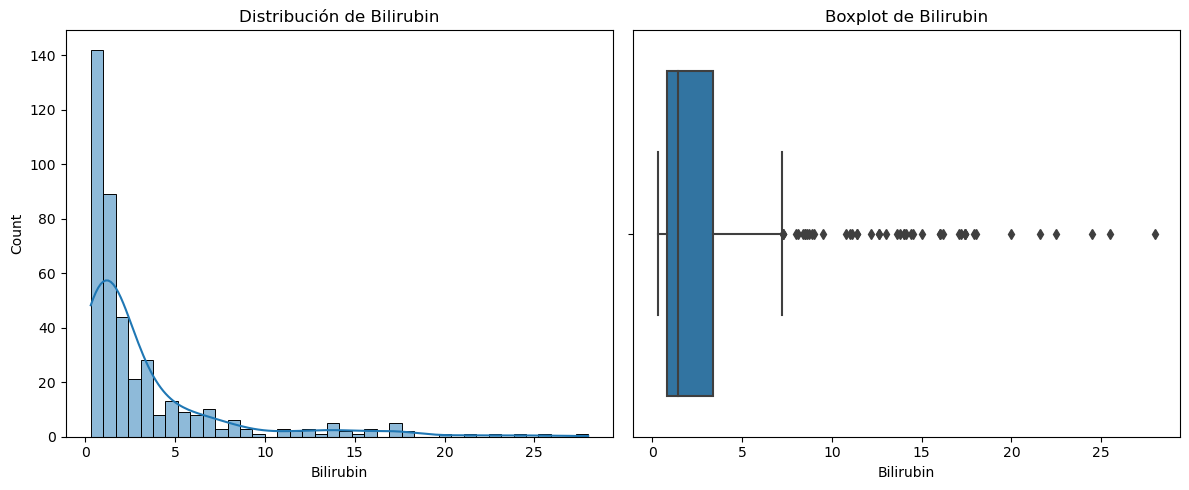

In [18]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Bilirubin'], kde=True)
plt.title('Distribución de Bilirubin')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Bilirubin'])
plt.title('Boxplot de Bilirubin')

plt.tight_layout()
plt.show()

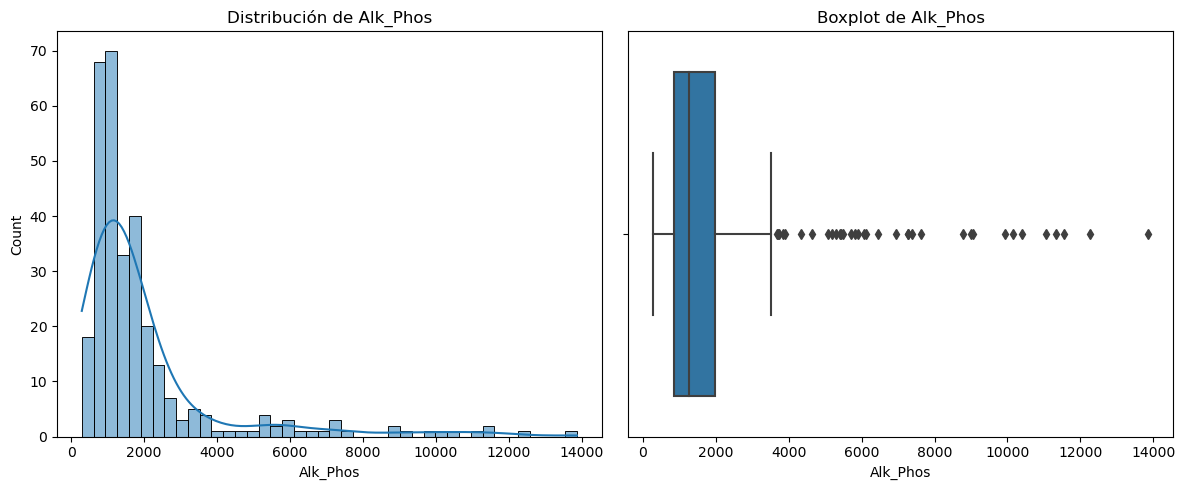

In [19]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Alk_Phos'], kde=True)
plt.title('Distribución de Alk_Phos')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Alk_Phos'])
plt.title('Boxplot de Alk_Phos')

plt.tight_layout()
plt.show()

Siguiendo el criterio de,  0 - 0.5, existe poca dispersión, 0.5-1 existen dispersión media y anomalías no graves y coeficiente > 1, demasiada dispersión y anomalías graves. 

La mayoria de las columnas no presentan una dispersion alarmante, pero existen dos columna que presentan una dispersión bastante alta, como lo es Bilirubin y Alk_Phos. 

El coefiente mayor a 1 son un indicador de dispersión bastante grande, por lo que podría no ser viable utilizar el método del rango intercuartílico para tratar los datos atípicos.

## Paso 3. Búsqueda de nulos y datos atípicos.
### - Muestre cuántos datos nulos tienen las columnas, puede apoyarse de un gráfico para mostrar la cantidad de nulos que hay.



In [20]:
nulos = df.isnull().sum().sort_values(ascending=False)
print(nulos)

Tryglicerides    136
Cholesterol      134
Copper           108
Drug             106
Ascites          106
Hepatomegaly     106
Spiders          106
SGOT             106
Alk_Phos         106
Platelets         11
Stage              6
Prothrombin        2
ID                 0
Albumin            0
N_Days             0
Edema              0
Sex                0
Age                0
Status             0
Bilirubin          0
dtype: int64


Podemos observar presencia de datos nulos en mas del  50% de las columnas, la gran mayoria de las columnas contienen una cantidad similar de datos nulos y un trio de columnas presentan niveles bajos, abra que determinar la mejor manera para tratarlos.

### - Muestre las distribuciones de las columnas numéricas y mencione si presentan datos atípicos/anomalías/outliers.

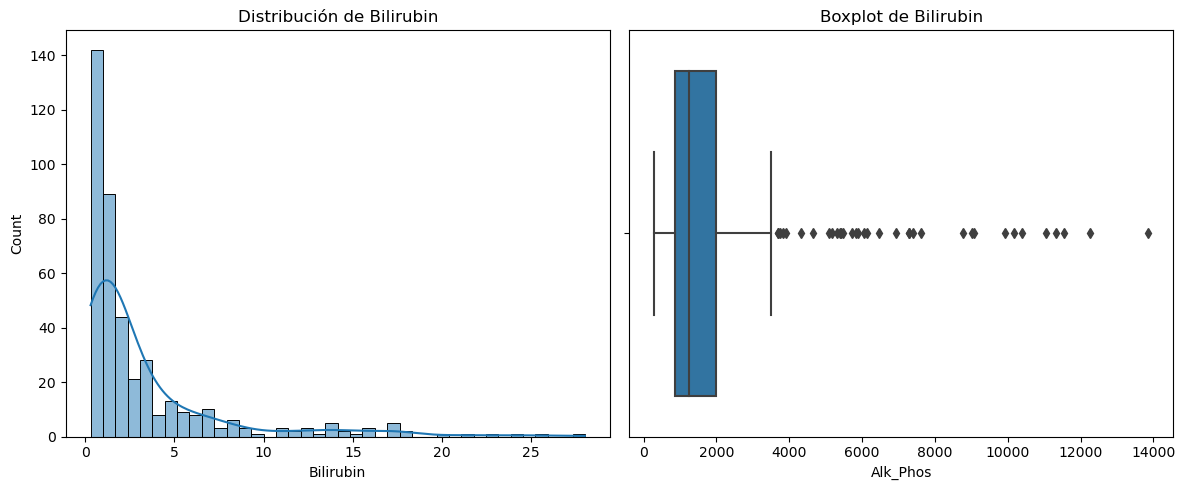

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Bilirubin'], kde=True)
plt.title('Distribución de Bilirubin')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Alk_Phos'])
plt.title('Boxplot de Bilirubin')

plt.tight_layout()
plt.show()

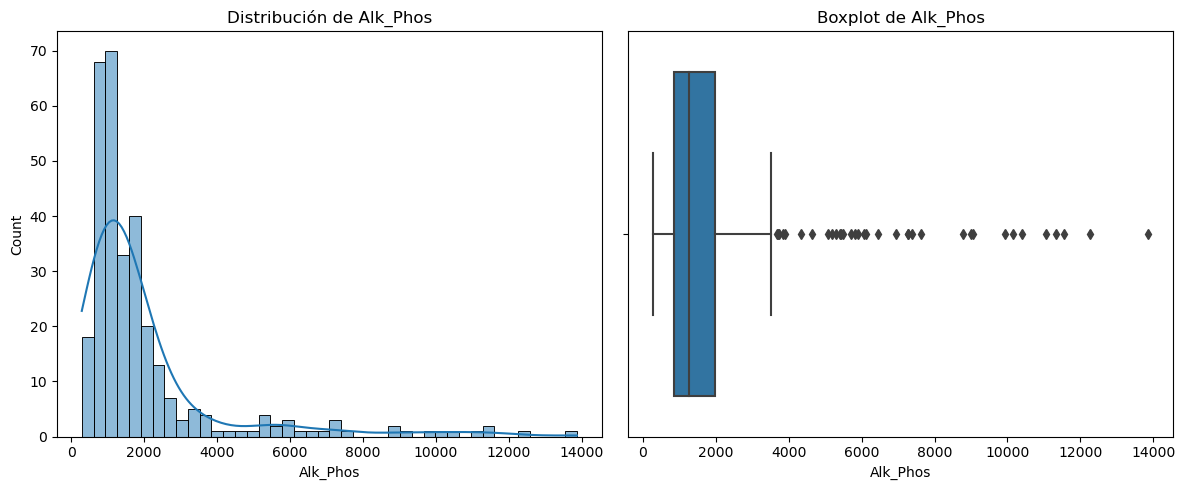

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Alk_Phos'], kde=True)
plt.title('Distribución de Alk_Phos')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Alk_Phos'])
plt.title('Boxplot de Alk_Phos')

plt.tight_layout()
plt.show()

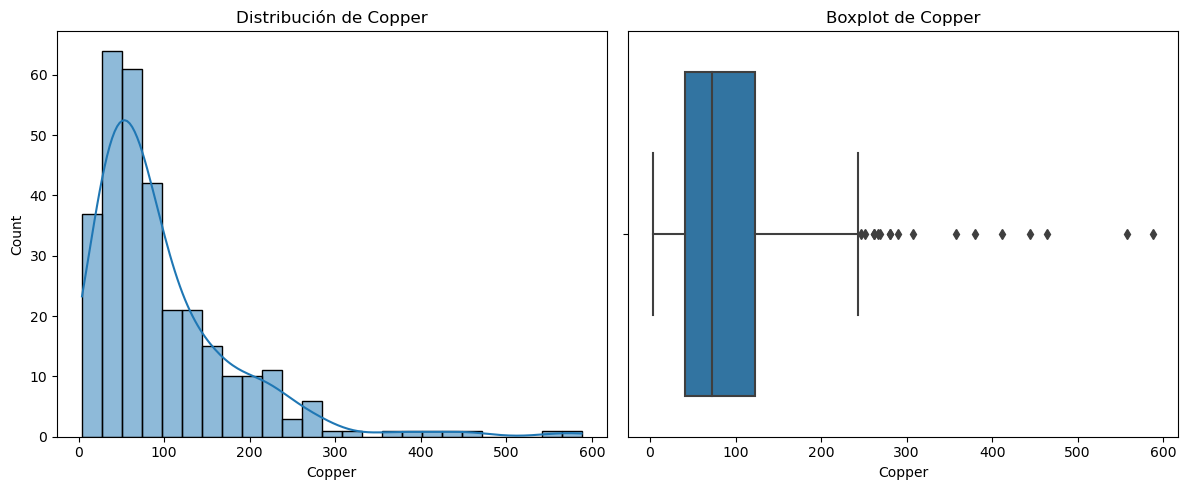

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Copper'], kde=True)
plt.title('Distribución de Copper')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Copper'])
plt.title('Boxplot de Copper')

plt.tight_layout()
plt.show()

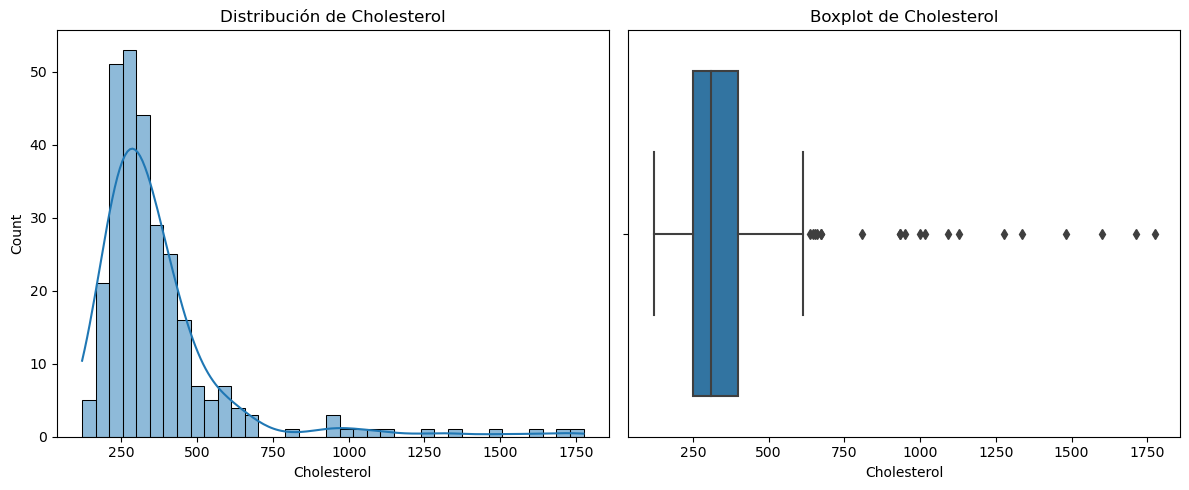

In [24]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Cholesterol'], kde=True)
plt.title('Distribución de Cholesterol')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Cholesterol'])
plt.title('Boxplot de Cholesterol')

plt.tight_layout()
plt.show()

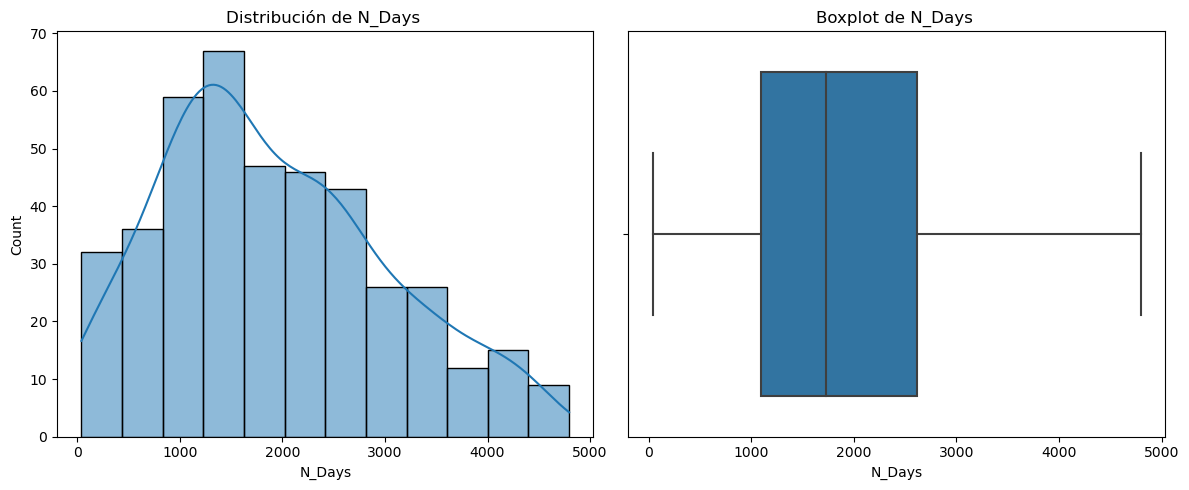

In [25]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['N_Days'], kde=True)
plt.title('Distribución de N_Days ')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['N_Days'])
plt.title('Boxplot de N_Days ')

plt.tight_layout()
plt.show()

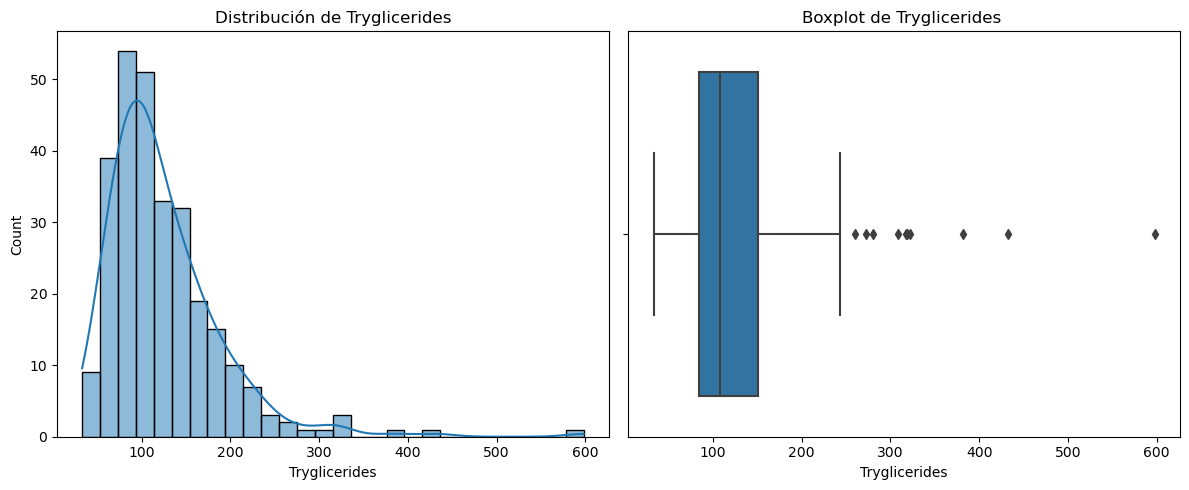

In [26]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Tryglicerides'], kde=True)
plt.title('Distribución de Tryglicerides')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Tryglicerides'])
plt.title('Boxplot de Tryglicerides ')

plt.tight_layout()
plt.show()

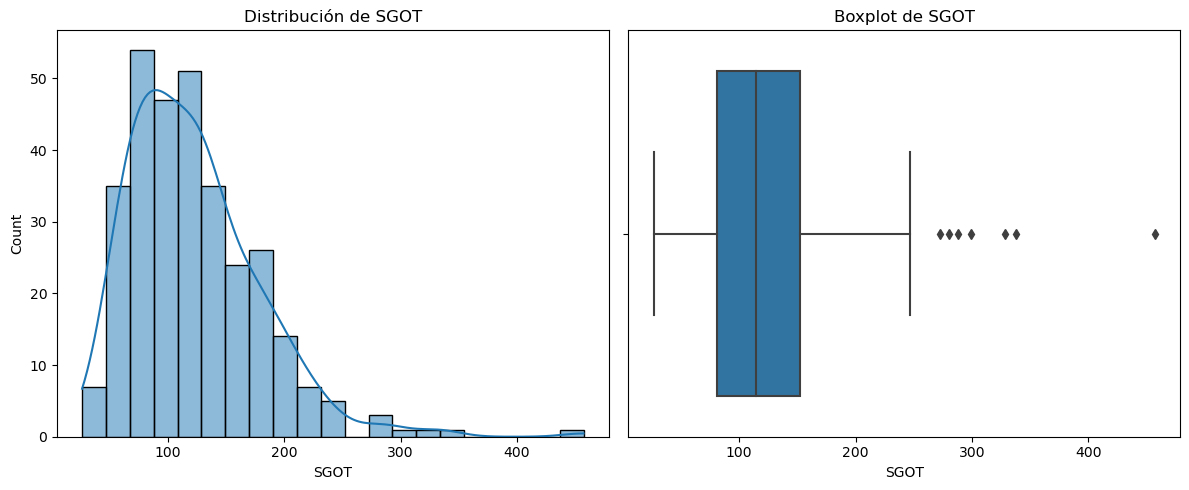

In [27]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['SGOT'], kde=True)
plt.title('Distribución de SGOT')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['SGOT'])
plt.title('Boxplot de SGOT')

plt.tight_layout()
plt.show()

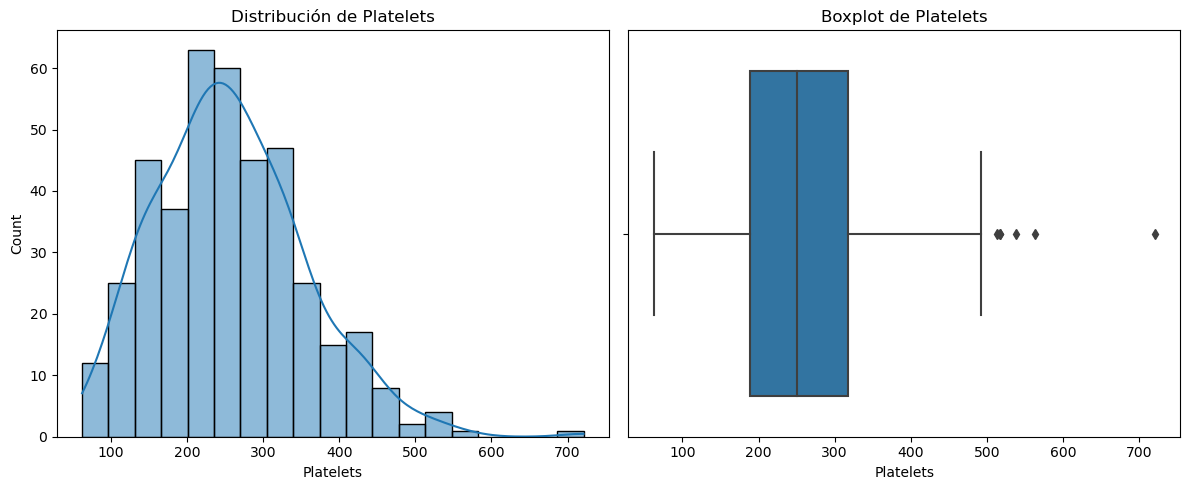

In [28]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Platelets'], kde=True)
plt.title('Distribución de Platelets')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Platelets'])
plt.title('Boxplot de Platelets')

plt.tight_layout()
plt.show()

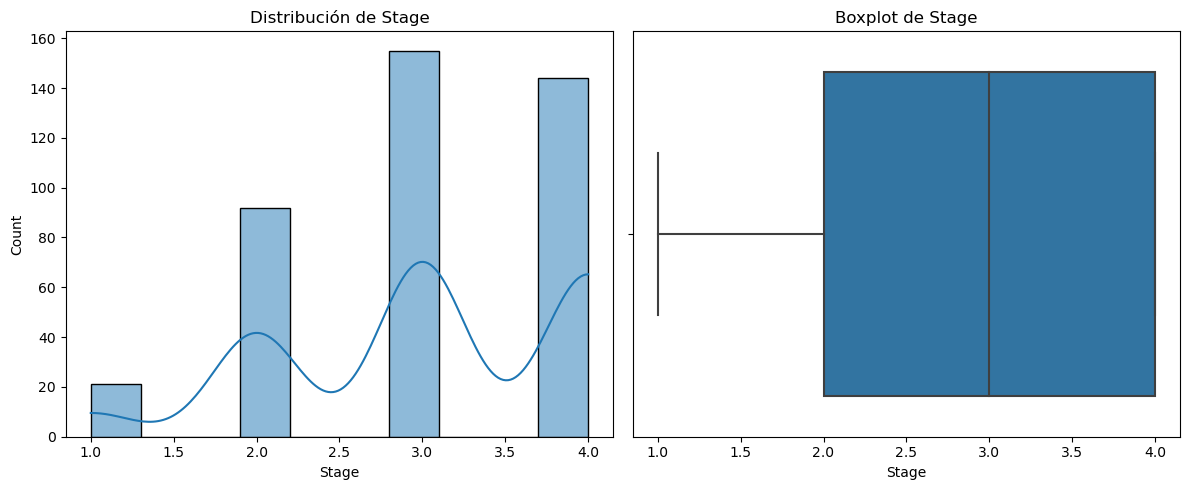

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Stage'], kde=True)
plt.title('Distribución de Stage')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Stage'])
plt.title('Boxplot de Stage')

plt.tight_layout()
plt.show()

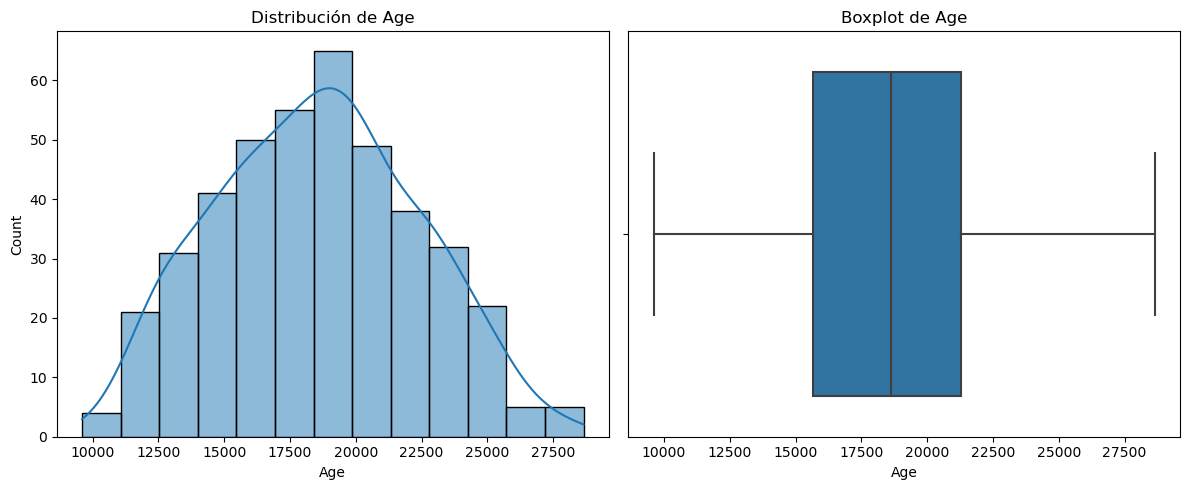

In [30]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribución de Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Age'])
plt.title('Boxplot de Age')

plt.tight_layout()
plt.show()

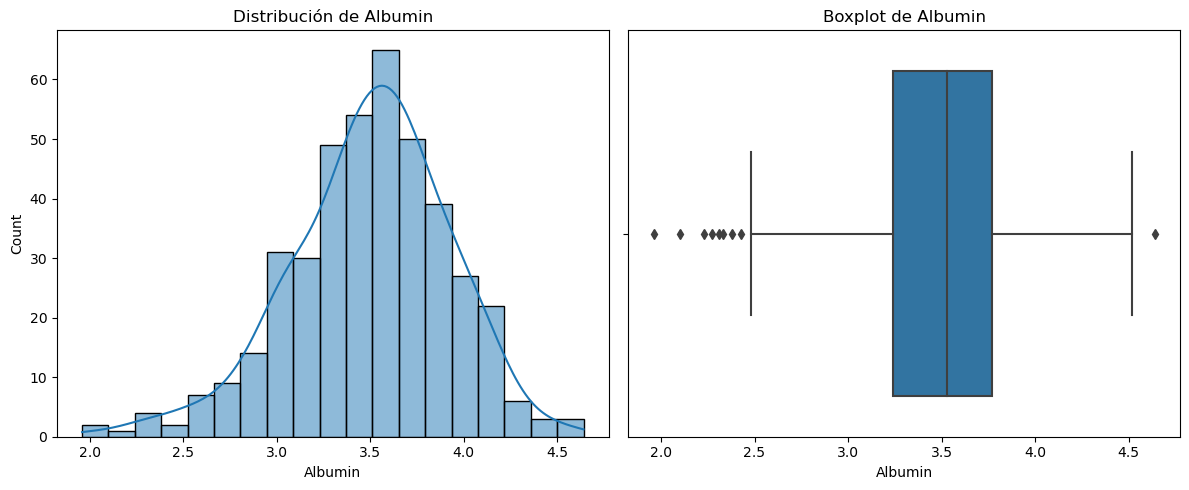

In [31]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Albumin'], kde=True)
plt.title('Distribución de Albumin')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Albumin'])
plt.title('Boxplot de Albumin')

plt.tight_layout()
plt.show()

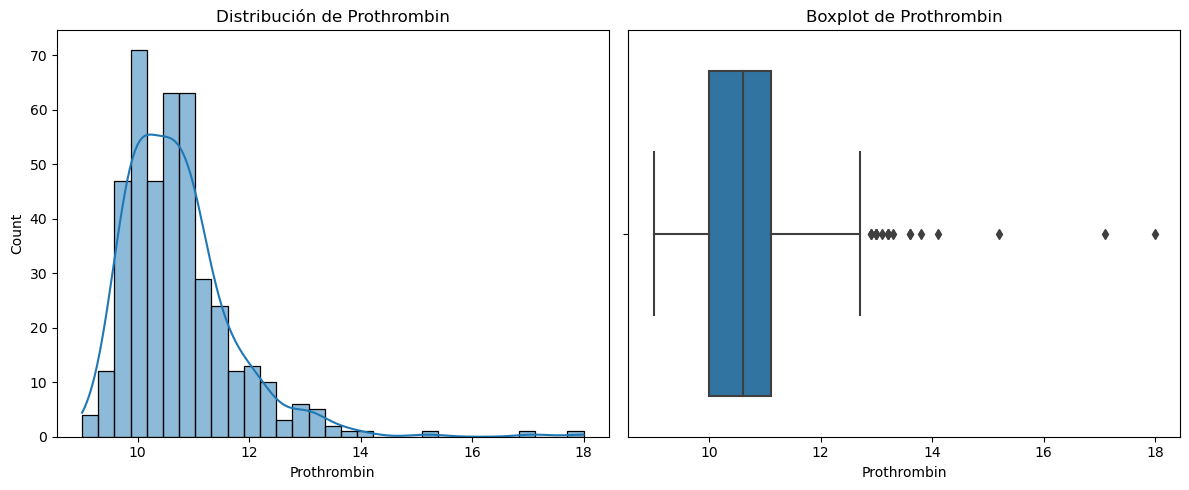

In [32]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Prothrombin'], kde=True)
plt.title('Distribución de Prothrombin')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Prothrombin'])
plt.title('Boxplot de Prothrombin')

plt.tight_layout()
plt.show()

Como podemos observar en los graficos de boxplot, las unicas columnas numericas que no presentan anomalias, son: N_Days, Stage y Age.

## Paso 4. Análisis de categorización.
### - Revise las columnas que son de tipo objeto, analice la cantidad de posibilidades que tienen.


In [33]:
print(f"Cantidad de datos unicos en la columna:", df['Status'].nunique())
print('Lista de valores unicos: ') 
df['Status'].unique().tolist()

Cantidad de datos unicos en la columna: 3
Lista de valores unicos: 


['D', 'C', 'CL']

In [34]:
print(f"Cantidad de datos unicos en la columna:", df['Drug'].nunique())
print('Lista de valores unicos: ') 
df['Drug'].unique().tolist()

Cantidad de datos unicos en la columna: 2
Lista de valores unicos: 


['D-penicillamine', 'Placebo', nan]

In [35]:
print(f"Cantidad de datos unicos en la columna:", df['Sex'].nunique())
print('Lista de valores unicos: ') 
df['Sex'].unique().tolist()

Cantidad de datos unicos en la columna: 2
Lista de valores unicos: 


['F', 'M']

In [36]:
print(f"Cantidad de datos unicos en la columna:", df['Ascites'].nunique())
print('Lista de valores unicos: ') 
df['Ascites'].unique().tolist()

Cantidad de datos unicos en la columna: 2
Lista de valores unicos: 


['Y', 'N', nan]

In [37]:
print(f"Cantidad de datos unicos en la columna:", df['Hepatomegaly'].nunique())
print('Lista de valores unicos: ') 
df['Hepatomegaly'].unique().tolist()

Cantidad de datos unicos en la columna: 2
Lista de valores unicos: 


['Y', 'N', nan]

In [38]:
print(f"Cantidad de datos unicos en la columna:", df['Spiders'].nunique())
print('Lista de valores unicos: ') 
df['Spiders'].unique().tolist()

Cantidad de datos unicos en la columna: 2
Lista de valores unicos: 


['Y', 'N', nan]

In [39]:
print(f"Cantidad de datos unicos en la columna:", df['Edema'].nunique())
print('Lista de valores unicos: ') 
df['Edema'].unique().tolist()

Cantidad de datos unicos en la columna: 3
Lista de valores unicos: 


['Y', 'N', 'S']

### - Determine si una (o algunas) puede ser categorizable, aún no la(s) categorice.

Una vez analizado los valores únicos detectados en las columnas objeto, puedo determinar que es viable la categorización de las 7 columnas.


La mayoría de estas columnas presentan valores simples que nos indica una pertenencia a un grupo u otro. Este dato puede ser clave para determinar que tipo de encoder podriamos utilizar en dado caso que se requiera convertir a numerico.  

## Paso 5. Correlación y análisis del problema.


### - Muestre la correlación de los datos numéricos con respecto a la columna "Status", para ello tendrá que volver numérica dicha columna (para este paso puede usar un encoder).

In [40]:
from sklearn.preprocessing import LabelEncoder
df_copy = df.copy()
label_encoder = LabelEncoder()
df_copy['Status'] = label_encoder.fit_transform(df_copy['Status'])

In [41]:
correlation_matrix = df_copy.corr(numeric_only=True)
correlation_with_status = correlation_matrix['Status'].sort_values(ascending=False)
print(correlation_with_status)

Status           1.000000
Bilirubin        0.429722
Copper           0.388296
Prothrombin      0.339424
Stage            0.320291
SGOT             0.294376
Alk_Phos         0.225822
Tryglicerides    0.212486
Age              0.191525
Cholesterol      0.187275
Platelets       -0.083823
Albumin         -0.261674
ID              -0.282416
N_Days          -0.416651
Name: Status, dtype: float64


Únicamente contamos con dos relaciones que se consideran mediante fuertes con un coeficiente de relación de 4, una de ellas con la variable Bilirubin y una relación negativa con la variable N_Days

### - El objetivo es predecir con estos datos la variable "Status".

Siguiendo el criterio de que, 0.1 - 0.3 se considera una relación débil, de 0.3- 0.5 una relación media y de 0.5 a 1 una relación muy fuerte.

En general presentamos correlaciones débiles, si observamos el listado de coeficientes únicamente contamos con dos relaciones que se consideran mediante fuertes con un coeficiente de relación de 4, una de ellas con la variable Bilirubin y una relación negativa con la variable N_Days.



### - ¿Con los datos que se tienen se puede predecir correctamente esa variable?

Es probable, pero considero que al no presentar relaciones fuertes, tendríamos que recurrir a alguna técnica avanzada para mejorar el modelo. 

### - Si tuviera que seleccionar un modelo para hacer las predicciones, ¿cuál sería?

Considerando que estamos ante un problema de clasificación y que no contamos con correlaciones lo suficientemente fuertes, optaría por trabajar un modelo de regresión logística o un arbol de decisión. 

# PARTE II: MANIPULACIÓN Y TRATAMIENTO.

## Paso 1. Tratamiento de datos nulos.
### - Trate los datos nulos acorde a lo que se ha visto previamente en el curso.


In [42]:
nulos = df.isnull().sum().sort_values(ascending=False)
print(nulos)

Tryglicerides    136
Cholesterol      134
Copper           108
Drug             106
Ascites          106
Hepatomegaly     106
Spiders          106
SGOT             106
Alk_Phos         106
Platelets         11
Stage              6
Prothrombin        2
ID                 0
Albumin            0
N_Days             0
Edema              0
Sex                0
Age                0
Status             0
Bilirubin          0
dtype: int64


Después de listar los datos nulos, se puede observar que existen columnas cuyo número de nulos es bajo,  por lo tanto, verificaremos las columnas que no exceden el 5% recomendado para realizar la eliminación. 
Posterior a esto, si aún existen datos nulos, recordaremos los gráficos de distribución y boxplot, para determinar cuál de la medida de tendencia central es la más óptima para imputar, todas las columnas objeto será imputada con la moda.   

In [43]:
limite = len(df) * 0.05
print(f"El límite será {limite}")
print("")

print("Columnas que superan el limite:")
columnas_a_imputar = df.columns[(df.isna().sum() > limite) & (df.isna().sum() > 0)]
print("")
print(columnas_a_imputar)
print("")
print("Columnas que no superan el límite:")
columnas_a_eliminar = df.columns[(df.isna().sum() <= limite) & (df.isna().sum() > 0)]
print("")
print(columnas_a_eliminar)

El límite será 20.900000000000002

Columnas que superan el limite:

Index(['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Cholesterol', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides'],
      dtype='object')

Columnas que no superan el límite:

Index(['Platelets', 'Prothrombin', 'Stage'], dtype='object')


Detectamos que las columnas 'Platelets','Prothrombin' y 'Stage', son columnas que no superan el limite, estas columnas seran tratadas con la eliminacion. 

In [44]:
df_limpio = df.dropna(subset=columnas_a_eliminar).copy()
print(df_limpio.isna().sum().sort_values(ascending=False))

Tryglicerides    121
Cholesterol      119
Copper            93
Drug              91
Ascites           91
Hepatomegaly      91
Spiders           91
SGOT              91
Alk_Phos          91
ID                 0
Prothrombin        0
Platelets          0
Bilirubin          0
Albumin            0
N_Days             0
Edema              0
Sex                0
Age                0
Status             0
Stage              0
dtype: int64


Trataremos las columnas 'Drug','Ascites','Hepatomegaly', y 'Spiders', realizando la imputación con la moda. 

In [45]:
col_categoricas = df_limpio.select_dtypes(include=['object']).columns


for col in col_categoricas:
    if df_limpio[col].isnull().sum() > 0:
        moda = df_limpio[col].mode()[0]
        df_limpio[col].fillna(moda, inplace=True)


In [46]:
print(df_limpio.isna().sum().sort_values(ascending=False))

Tryglicerides    121
Cholesterol      119
Copper            93
SGOT              91
Alk_Phos          91
ID                 0
N_Days             0
Prothrombin        0
Platelets          0
Albumin            0
Bilirubin          0
Edema              0
Spiders            0
Hepatomegaly       0
Ascites            0
Sex                0
Age                0
Drug               0
Status             0
Stage              0
dtype: int64


Recordando los graficos de distribucion y los boxplot mostrado anteriormente, estas columnas presentan sesgo positivo, los cual nos indica que lo mas viable es imputar con la medida de tendencia central "mediana"

In [47]:
col_num = df_limpio.select_dtypes(include=['number']).columns


for col in col_num:
    if df_limpio[col].isnull().sum() > 0:
        mediana = df_limpio[col].median()
        df_limpio[col].fillna(mediana, inplace=True)

### - Muestre la cantidad de datos nulos antes y después del tratamiento.

In [48]:
print(df_limpio.isna().sum().sort_values(ascending=False))

ID               0
N_Days           0
Prothrombin      0
Platelets        0
Tryglicerides    0
SGOT             0
Alk_Phos         0
Copper           0
Albumin          0
Cholesterol      0
Bilirubin        0
Edema            0
Spiders          0
Hepatomegaly     0
Ascites          0
Sex              0
Age              0
Drug             0
Status           0
Stage            0
dtype: int64


In [49]:
print ("Conteo de datos, despues de tratar nulos:")
print (df_limpio.shape)

Conteo de datos, despues de tratar nulos:
(399, 20)


## Paso 2. Tratamiento de anomalías.
### - Enfrente los datos extremos y las anomalías.
### - Es libre de utilizar los métodos que prefiera, trate de no perder muchos datos (se tiene un dataset pequeño).



Tomando en consideración los coeficientes de dispersión analizados anteriormente, excluiremos las columnas que superen "Bilirubin", "Alk_Phos" y "Copper" debido a que su coeficiente de variación es alto y podrían representar una perdida significativa de datos, considerando de tratar los nulos nuestra data cuenta con 399 datos, considero que es un número pequeño.

De igual manera excluiremos las columnas   Age, stage y N_Days, debido a que dichas columnas no presentan datos atipicos.

Para tratar estos datos atípicos utilizaremos el método del rango intercuartílico.  



### - Muestre las distribuciones tratadas antes del tratamiento.

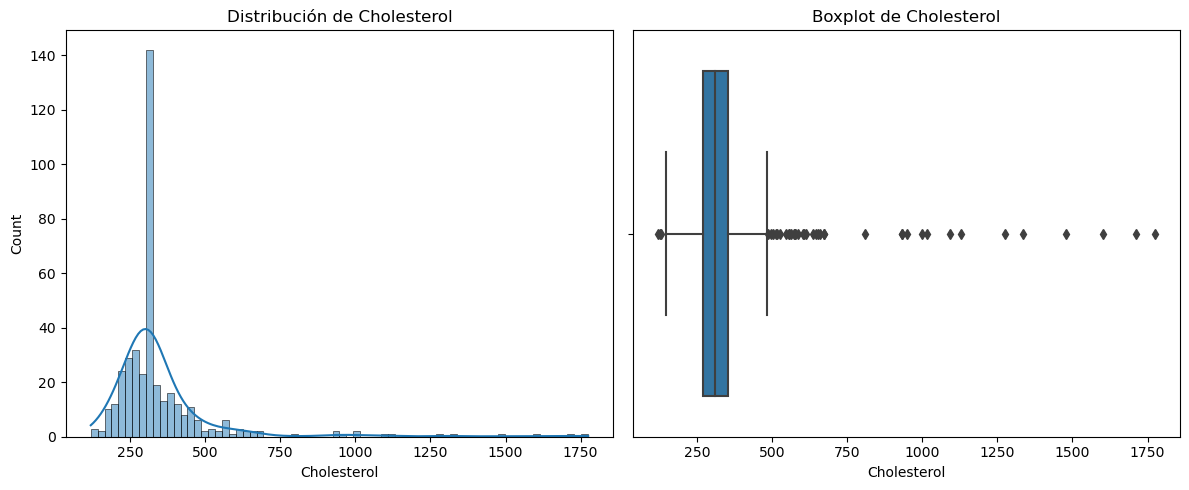

In [50]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_limpio['Cholesterol'], kde=True)
plt.title('Distribución de Cholesterol')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_limpio['Cholesterol'])
plt.title('Boxplot de Cholesterol')

plt.tight_layout()
plt.show()

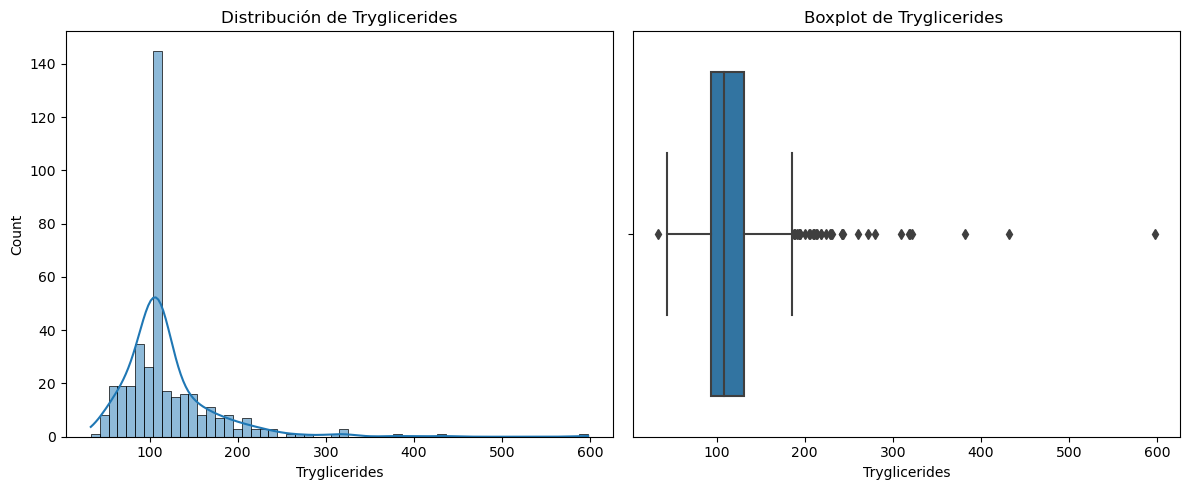

In [51]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_limpio['Tryglicerides'], kde=True)
plt.title('Distribución de Tryglicerides')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_limpio['Tryglicerides'])
plt.title('Boxplot de Tryglicerides ')

plt.tight_layout()
plt.show()

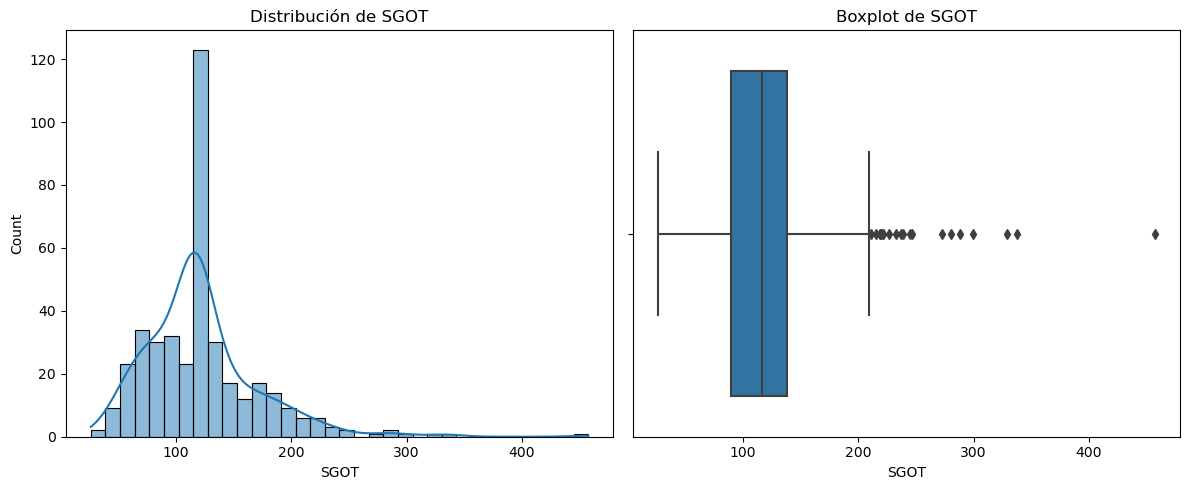

In [52]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_limpio['SGOT'], kde=True)
plt.title('Distribución de SGOT')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_limpio['SGOT'])
plt.title('Boxplot de SGOT')

plt.tight_layout()
plt.show()

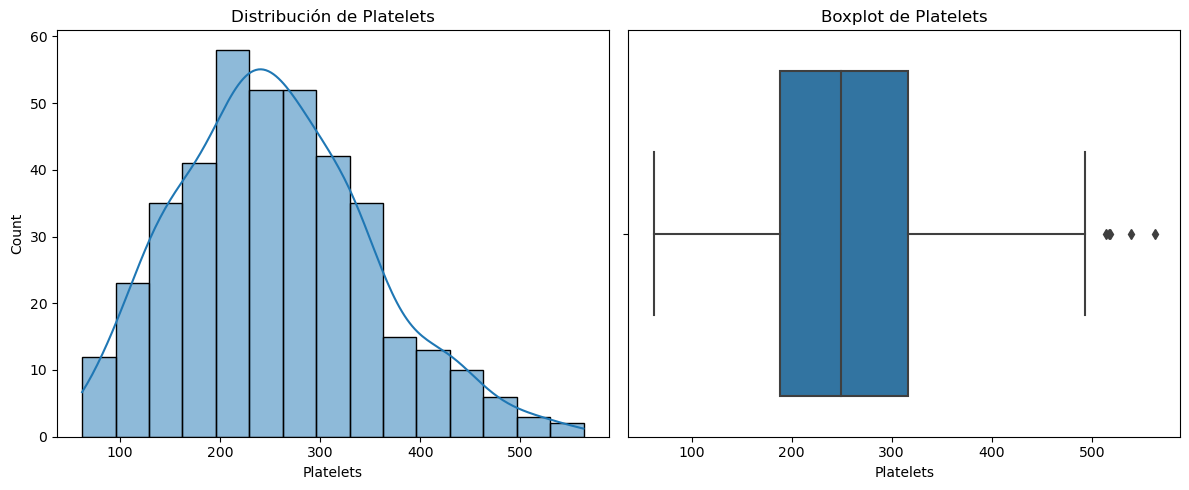

In [53]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_limpio['Platelets'], kde=True)
plt.title('Distribución de Platelets')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_limpio['Platelets'])
plt.title('Boxplot de Platelets')

plt.tight_layout()
plt.show()

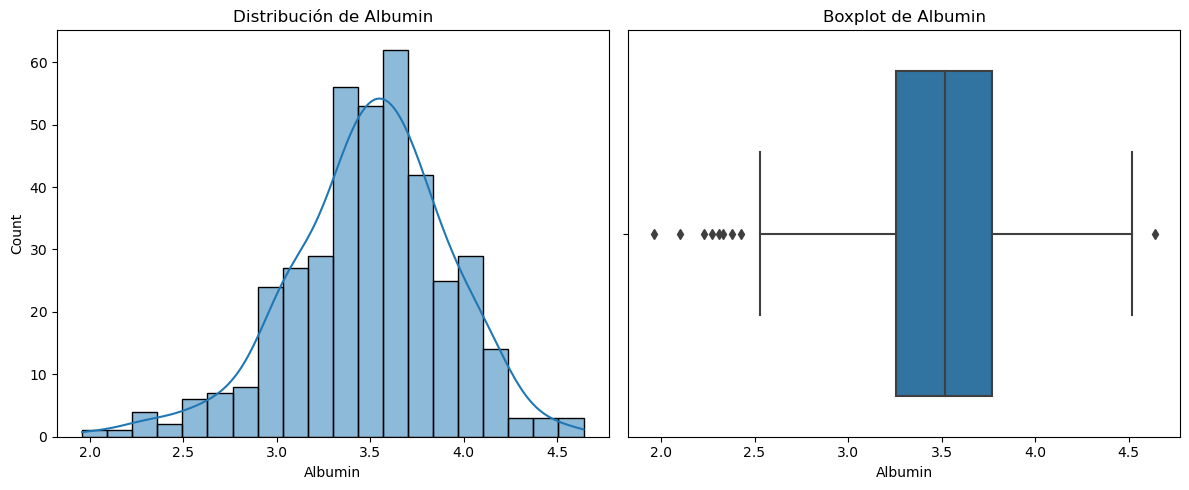

In [54]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_limpio['Albumin'], kde=True)
plt.title('Distribución de Albumin')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_limpio['Albumin'])
plt.title('Boxplot de Albumin')

plt.tight_layout()
plt.show()

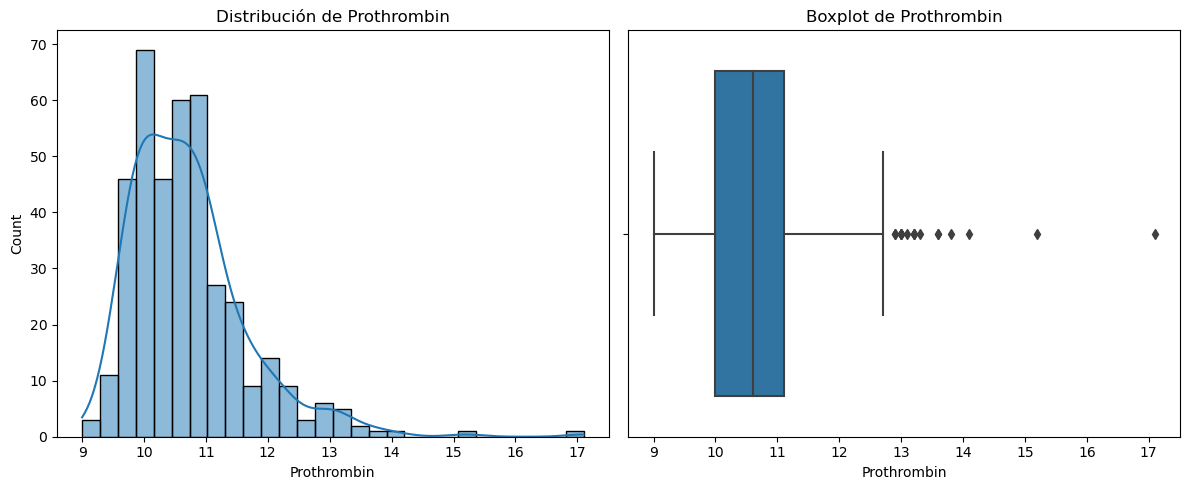

In [55]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_limpio['Prothrombin'], kde=True)
plt.title('Distribución de Prothrombin')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_limpio['Prothrombin'])
plt.title('Boxplot de Prothrombin')

plt.tight_layout()
plt.show()

In [56]:
def aplicar_iqr_a_columnas(df):
    for columna in df.select_dtypes(include=['number']).columns:
        if columna not in ["ID", "Age", "Stage","N_Days","Bilirubin","Alk_Phos","Copper"]:
            q3 = df[columna].quantile(0.75)
            q1 = df[columna].quantile(0.25)
            iqr = q3 - q1
            lsuperior = q3 + (1.5 * iqr)
            linferior = q1 - (1.5 * iqr)
            df = df[(df[columna] > linferior) & (df[columna] < lsuperior)]

    return df

df_limpio = aplicar_iqr_a_columnas(df_limpio)

In [57]:
print ("Conteo de datos despues de tratar atipicos:")
print (df_limpio.shape)

Conteo de datos despues de tratar atipicos:
(260, 20)


### - Muestre las distribuciones tratadas despues del tratamiento.

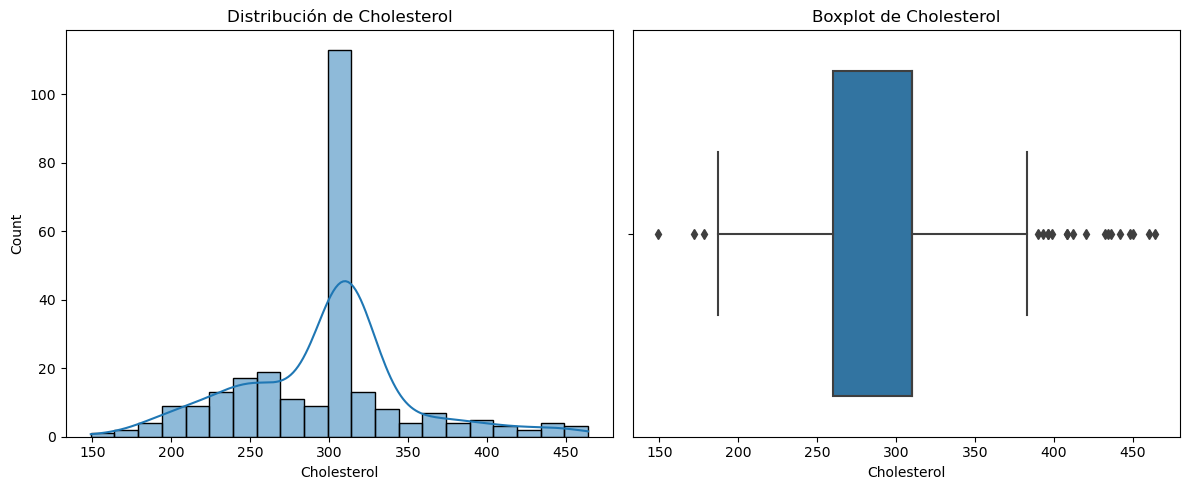

In [58]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_limpio['Cholesterol'], kde=True)
plt.title('Distribución de Cholesterol')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_limpio['Cholesterol'])
plt.title('Boxplot de Cholesterol')

plt.tight_layout()
plt.show()

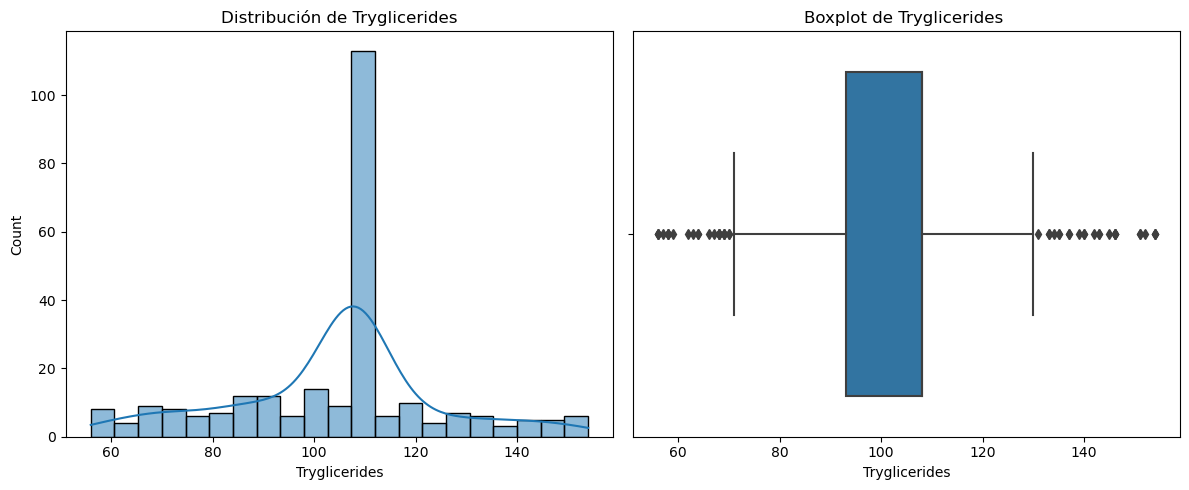

In [59]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_limpio['Tryglicerides'], kde=True)
plt.title('Distribución de Tryglicerides')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_limpio['Tryglicerides'])
plt.title('Boxplot de Tryglicerides ')

plt.tight_layout()
plt.show()

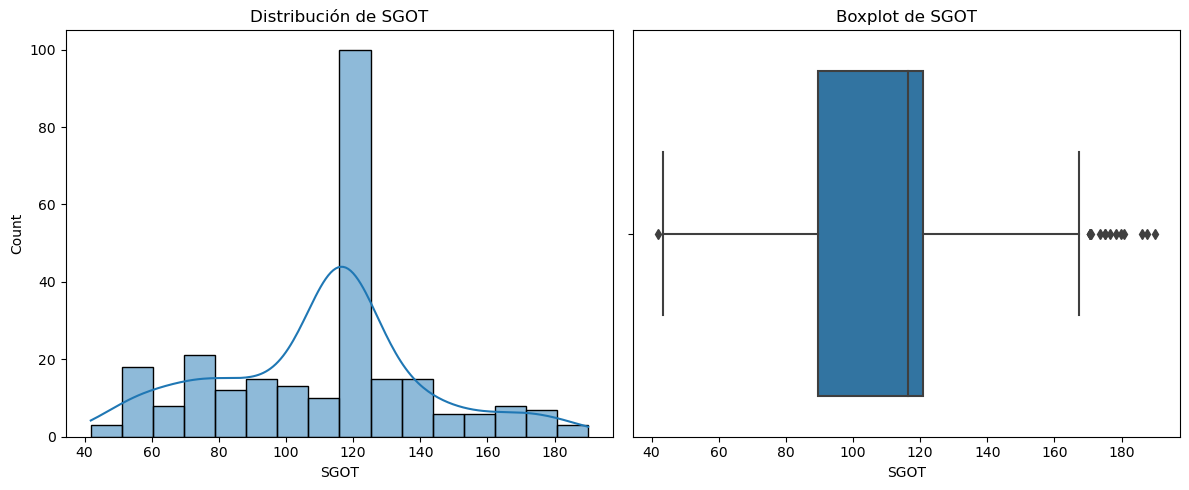

In [60]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_limpio['SGOT'], kde=True)
plt.title('Distribución de SGOT')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_limpio['SGOT'])
plt.title('Boxplot de SGOT')

plt.tight_layout()
plt.show()

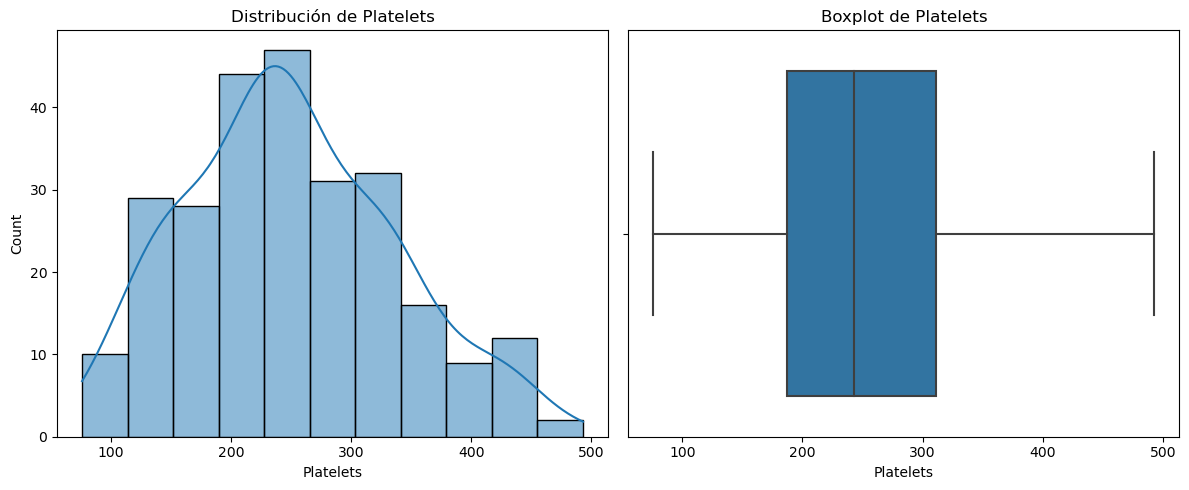

In [61]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_limpio['Platelets'], kde=True)
plt.title('Distribución de Platelets')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_limpio['Platelets'])
plt.title('Boxplot de Platelets')

plt.tight_layout()
plt.show()

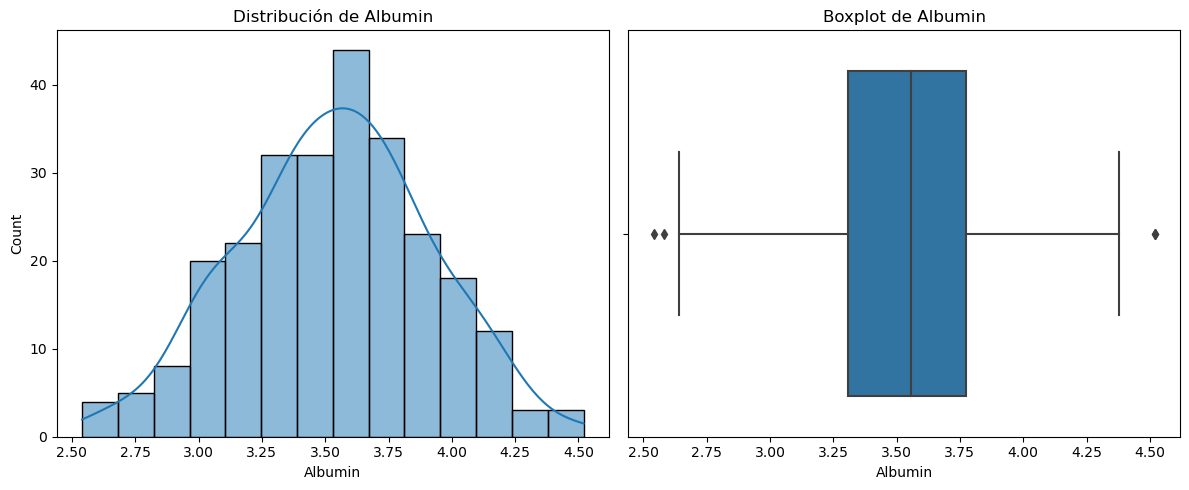

In [62]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_limpio['Albumin'], kde=True)
plt.title('Distribución de Albumin')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_limpio['Albumin'])
plt.title('Boxplot de Albumin')

plt.tight_layout()
plt.show()

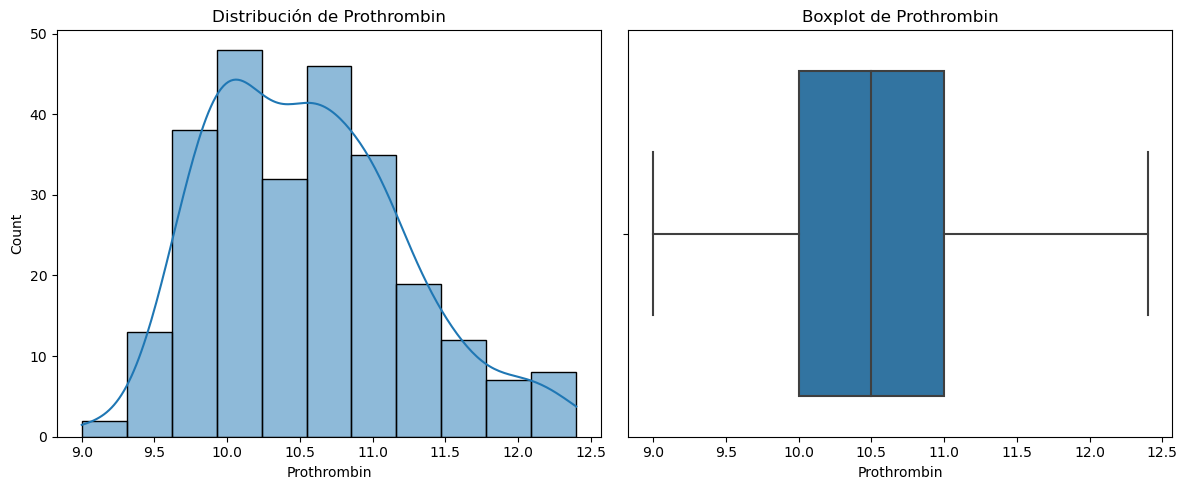

In [63]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_limpio['Prothrombin'], kde=True)
plt.title('Distribución de Prothrombin')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_limpio['Prothrombin'])
plt.title('Boxplot de Prothrombin')

plt.tight_layout()
plt.show()

## Paso 3. Categorización.
### - Seleccione las columnas de tipo objeto candidatas a la categorización.

Como mencione anteriormente, debido a que las columnas objeto parecen contener datos que reflejan el resultado de respuestas de (Y/N), (F/M), que indican categorías binarias, y una columna que presenta 3 valores para el estado, todas son candidatas a la categorización. 

### - Realice la categorización.

In [64]:
for columna in df_limpio.columns:
    if df_limpio[columna].dtype == 'object':
        df_limpio[columna] = df_limpio[columna].astype('category')


### - Muestre la información del dataframe para demostrar que se realizó con éxito.

In [65]:
df_limpio.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 1 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             260 non-null    int64   
 1   N_Days         260 non-null    int64   
 2   Status         260 non-null    category
 3   Drug           260 non-null    category
 4   Age            260 non-null    int64   
 5   Sex            260 non-null    category
 6   Ascites        260 non-null    category
 7   Hepatomegaly   260 non-null    category
 8   Spiders        260 non-null    category
 9   Edema          260 non-null    category
 10  Bilirubin      260 non-null    float64 
 11  Cholesterol    260 non-null    float64 
 12  Albumin        260 non-null    float64 
 13  Copper         260 non-null    float64 
 14  Alk_Phos       260 non-null    float64 
 15  SGOT           260 non-null    float64 
 16  Tryglicerides  260 non-null    float64 
 17  Platelets      260 non-null    floa

## Paso 4. Tratamiento de incosistencias.
### - En la categorización anterior, ¿hay inconsistencias?


En el vistazo previo, podíamos detectar en muchas de ellas una existía una categoría NAN que hace referencia a aquellas celdas nulas, al contar con valores que reflejan una pertenencia clara a dos grupos diferentes, el set de datos no presentaba anomalías a simple vista, ahora que tratamos los datos nulos será más fácil identificar si alguna columna presenta alguna anomalía.  



### - Revise las posibles opciones de cada columna categorizada, si encuentra alguna inconsistencia hay que tratarla.

In [66]:
columnas_categoricas = df_limpio.select_dtypes(include=['category']).columns
for columna in columnas_categoricas:
    datos_unicos = df_limpio[columna].nunique()
    repeticiones = df_limpio[columna].value_counts()
    
    print(f'\nColumna: {columna} \n')
    print(f'Número de datos únicos: {datos_unicos} \n')
    print(f'Datos únicos y su frecuencia:\n{repeticiones}\n')


Columna: Status 

Número de datos únicos: 3 

Datos únicos y su frecuencia:
C     172
D      72
CL     16
Name: Status, dtype: int64


Columna: Drug 

Número de datos únicos: 2 

Datos únicos y su frecuencia:
D-penicillamine    177
Placebo             83
Name: Drug, dtype: int64


Columna: Sex 

Número de datos únicos: 2 

Datos únicos y su frecuencia:
F    236
M     24
Name: Sex, dtype: int64


Columna: Ascites 

Número de datos únicos: 2 

Datos únicos y su frecuencia:
N    250
Y     10
Name: Ascites, dtype: int64


Columna: Hepatomegaly 

Número de datos únicos: 2 

Datos únicos y su frecuencia:
Y    169
N     91
Name: Hepatomegaly, dtype: int64


Columna: Spiders 

Número de datos únicos: 2 

Datos únicos y su frecuencia:
N    215
Y     45
Name: Spiders, dtype: int64


Columna: Edema 

Número de datos únicos: 3 

Datos únicos y su frecuencia:
N    225
S     28
Y      7
Name: Edema, dtype: int64




### - Puede emplear gráficas de conteos para validar si una categoría se podría considerar como inconsistente.

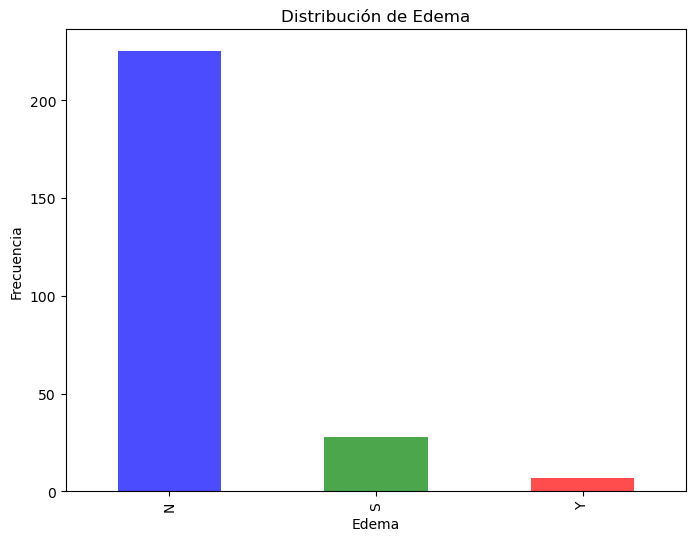

In [67]:
plt.figure(figsize=(8, 6))
df_limpio['Edema'].value_counts().plot(kind='bar', color=['blue', 'green', 'red'], alpha=0.7)
plt.title('Distribución de Edema')
plt.xlabel('Edema')
plt.ylabel('Frecuencia')
plt.show()

Ahora que analizamos las columnas, como mencione anteriormente, fue muy fácil descartar las anomalías, ya que las columnas tienen valores binarios fáciles de detectar; sin embargo, existe una columna llamada "Edema" en la cual podemos detectar valores de (Y/N) que claramente dan a entender que son valores de Si y No en inglés, dentro de esta columna identificamos una tercera clasificación (S) que podría ser que sea un error al ingresar las respuestas (Y) como (S) como si se estuvieran capturando en español. 


Así que bajo esta hipótesis mapearemos los datos que contienen el valor (S) y cambiaremos por la respectiva (Y), para tener consistencia en la informacion.  

In [68]:
mapping = {'S':'Y'}
df_limpio['Edema'] = df_limpio['Edema'].replace(mapping)
df_limpio['Edema'].unique().tolist()

['N', 'Y']

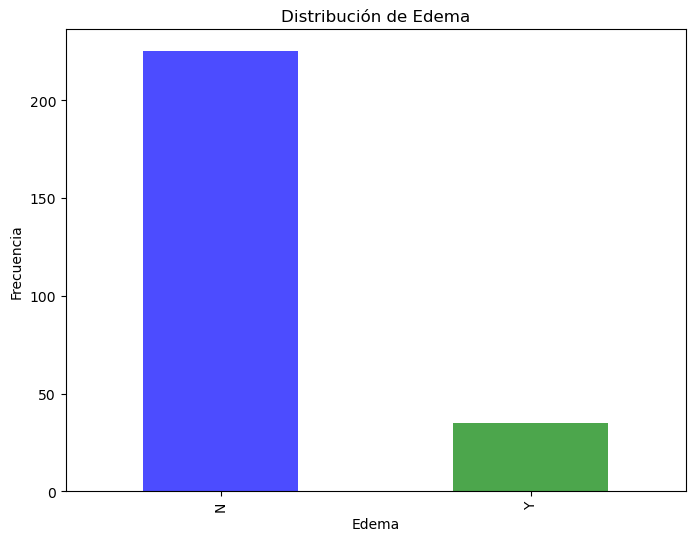

In [69]:
plt.figure(figsize=(8, 6))
df_limpio['Edema'].value_counts().plot(kind='bar', color=['blue', 'green', 'red'], alpha=0.7)
plt.title('Distribución de Edema')
plt.xlabel('Edema')
plt.ylabel('Frecuencia')
plt.show()

## Paso 5. Conversión a numérico.
### - Ya que tiene un dataframe sin datos nulos, sin inconsistencias y sin anomalías, hay que convertirlo a numérico.
### - Emplee un tipo de encoding adecuado a cada columna.

En este caso considero que es más apropiado utilizar LabelEncoder, ya que las categorías no presentan orden, la mayoría son categorías binarias, por esa razón utilizaremos este encoder para realizar la conversión a numérico. 

### - Construya un nuevo dataframe completamente numérico (incluyendo "Status", este debe ser forzosamente mediante LabelEncoding).


In [70]:
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, x, y=None):
        return self

    def transform(self, x):
        output = x.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, x, y=None):
        return self.fit(x, y).transform(x)



columnas_categoricas = df_limpio.select_dtypes(include='category').columns
df_limpio_V2 = df_limpio.copy()

encoder = LabelEncoder()
df_limpio_V2[columnas_categoricas] = df_limpio_V2[columnas_categoricas].apply(encoder.fit_transform)

### - Muestre la información del nuevo dataframe.

In [71]:
df_limpio_V2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 1 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             260 non-null    int64  
 1   N_Days         260 non-null    int64  
 2   Status         260 non-null    int32  
 3   Drug           260 non-null    int32  
 4   Age            260 non-null    int64  
 5   Sex            260 non-null    int32  
 6   Ascites        260 non-null    int32  
 7   Hepatomegaly   260 non-null    int32  
 8   Spiders        260 non-null    int32  
 9   Edema          260 non-null    int32  
 10  Bilirubin      260 non-null    float64
 11  Cholesterol    260 non-null    float64
 12  Albumin        260 non-null    float64
 13  Copper         260 non-null    float64
 14  Alk_Phos       260 non-null    float64
 15  SGOT           260 non-null    float64
 16  Tryglicerides  260 non-null    float64
 17  Platelets      260 non-null    float64
 18  Prothrombi

# PARTE III: MACHINE LEARNING.

## Paso 1. División de los datos.
### - Divide las columnas en la variable "X" y la variable "y".

In [72]:
Y = df_limpio_V2['Status']
X = df_limpio_V2.drop(['Status', 'ID'], axis=1)  

### - Muestree los datos en dos: entrenamiento y pruebas. La proporción de cada muestra queda a decisión suya.
### - Utilice una semilla para que los resultados puedan ser reproducibles.

In [73]:
from sklearn.model_selection import train_test_split

seed = 123
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(X, Y, test_size=0.2, random_state=seed)

## Paso 2. Abordaje mediante modelo simple.
### - Importe un modelo simple de ML, puede ser KNN, Regresión Logística o un árbol de decisión.


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report

modelo_rl = LogisticRegression(solver='liblinear', max_iter=200, penalty='l1', random_state=seed)

### - Entrene el modelo con los datos y realice las predicciones con la muestra de pruebas.

In [75]:
modelo_rl.fit(x_entrenamiento, y_entrenamiento)
predicciones_rl = modelo_rl.predict(x_prueba)

### - Muestre los resultados con f1_score, accuracy_score y classification_report.

In [76]:
f1 = f1_score(y_prueba, predicciones_rl, average='micro', zero_division=1)
accuracy = accuracy_score(y_prueba, predicciones_rl)
reporte_clasificacion = classification_report(y_prueba, predicciones_rl, zero_division=1)

print(f'F1 Score: {f1:.4f}')
print(f'Accuracy Score: {accuracy:.4f}')
print('\nClassification Report:\n', reporte_clasificacion)

F1 Score: 0.7115
Accuracy Score: 0.7115

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.91      0.79        32
           1       1.00      0.00      0.00         3
           2       0.73      0.47      0.57        17

    accuracy                           0.71        52
   macro avg       0.81      0.46      0.46        52
weighted avg       0.73      0.71      0.68        52



### - Analizando el reporte de clasificación, ¿qué tal se desempeñó su modelo?


El modelo de clasificación muestra un rendimiento general aceptable, con un F1 Score y Accuracy Score de aproximadamente 0.7115. Aunque logra predecir efectivamente, al observar el reporte podemos ver que se predice con exito la clase mayoritaria (Clase 0), pero enfrenta desafíos significativos en las clases minoritarias (Clase 1 y Clase 2).

El accuracy global es del 71%, indicando un buen rendimiento en general, pero el reporte de clasificación, nos indica que podria tener problemas por las clases desbalanceadas.

## Paso 3. Mejorando el modelo.
### - Emplee GridSearchCV para encontrar los mejores hiperparámetros para su modelo.
### - Valide con varias opciones.


In [77]:

from sklearn.model_selection import GridSearchCV

parametros = {
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
}
  
grid_search = GridSearchCV(modelo_rl, parametros, cv=5, scoring='f1_micro', verbose=1, n_jobs=-1)


grid_search.fit(x_entrenamiento, y_entrenamiento)


mejores_parametros = grid_search.best_params_
mejor_modelo = grid_search.best_estimator_

print(mejores_parametros)






Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}


### - Si su modelo no logra mejorar mucho, no se preocupe, es parte del aprendizaje.

In [78]:
modelo_rl = LogisticRegression(solver='lbfgs', max_iter=100, penalty='none', random_state=seed)
modelo_rl.fit(x_entrenamiento, y_entrenamiento)
predicciones_rl = modelo_rl.predict(x_prueba)

f1 = f1_score(y_prueba, predicciones_rl, average='micro', zero_division=1)
accuracy = accuracy_score(y_prueba, predicciones_rl)
reporte_clasificacion = classification_report(y_prueba, predicciones_rl, zero_division=1)

print(f'F1 Score: {f1:.4f}')
print(f'Accuracy Score: {accuracy:.4f}')
print('\nClassification Report:\n', reporte_clasificacion)

F1 Score: 0.7500
Accuracy Score: 0.7500

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84        32
           1       0.00      0.00      1.00         3
           2       1.00      0.41      0.58        17

    accuracy                           0.75        52
   macro avg       0.58      0.47      0.81        52
weighted avg       0.77      0.75      0.77        52



El modelo mostró mejoras en relación con las métricas F1 Score y Accuracy aunque fue poco lo que mejoro, si demostro una mejora en comparacion al modelo anterior. 

## Paso 4. Ensambles.
### - Utilice el ensamble de VotingClassifier para mejorar el rendimiento.
### - Seleccione al menos 4 modelos simples diferentes y úselos dentro del ensamble (Stacking).
### - Entrene el meta-modelo y valide su rendimiento con f1_score, accuracy_score y classification_report.


In [79]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


modelo_rl2 = LogisticRegression(solver='liblinear', max_iter=200, penalty='l1', random_state=seed)
modelo_cdt = DecisionTreeClassifier()
modelo_knn = KNeighborsClassifier()
modelo_rf = RandomForestClassifier()

voting_classifier = VotingClassifier([
    ('Logistic Regression', modelo_rl2),  
    ('Decision Tree Classifier', modelo_cdt),
    ('Neighbors Classifier', modelo_knn),
    ('Random Forest Classifier', modelo_rf)
])

voting_classifier.fit(x_entrenamiento, y_entrenamiento)
x_prueba_np = np.array(x_prueba)
predicciones = voting_classifier.predict(x_prueba_np)

#voting_classifier.fit(x_entrenamiento, y_entrenamiento)

#predicciones = voting_classifier.predict(x_prueba)


f1 = f1_score(y_prueba, predicciones, average='weighted')
accuracy = accuracy_score(y_prueba, predicciones)


reporte_clasificacion = classification_report(y_prueba, predicciones)
print("Classification Report:\n", reporte_clasificacion)


print("F1 Score:", f1)
print("Accuracy Score:", accuracy)


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.97      0.81        32
           1       0.00      0.00      0.00         3
           2       0.86      0.35      0.50        17

    accuracy                           0.71        52
   macro avg       0.52      0.44      0.44        52
weighted avg       0.70      0.71      0.66        52

F1 Score: 0.658966033966034
Accuracy Score: 0.7115384615384616


### - Analizando el classification_report, ¿qué tal se desempeñó el modelo?

En general, el F1-score y la precisión ponderada son moderados, lo que indica un rendimiento aceptable del modelo.
Si realizamos una comparativa con el modelo simple, aunque ambos modelos tienen una precisión similar en términos de accuracy, el F1-score estos valores siguen siendo mas altos en el modelo simple, con los hiperparametros seleccionados gracias al gridserch, el primer modelo parece tener un rendimiento ligeramente mejor.

Considero que el modelo no reflejo mejoras considerables. 

## Paso 5. Modelo supremo.
### - Con los resultados del paso 4 y 5, determine qué camino seguirá: tomar un modelo y mejorarlo o usar el meta-modelo y mejorarlo.
### - Mejore su modelo hasta el máximo, para eso se recomienda utilizar una Pipeline (puede ser con Pipeline o make_pipeline).
### - Dependiendo del modelo que haya seleccionado, debe buscar mejores hiperparámetros, escalar, normalizar, estandarizar o hacer cambios importantes en los datos (como seleccionar únicamente las variables de mayor correlación), también puede emplear PCA para reducir dimensionalidad.
### - El objetivo es que el modelo generado en este paso sea superior a los modelos del paso 4 y 5.
### - Para este paso también puede utilizar las SVM, RandomForest y Redes Neuronales Artificiales (SKLearn).

In [80]:
# Aqui iria el modelo supremo.


## - Emplee PCA con las columnas de la variable X (con los datos completos) y reduzca su dimensionalidad a 2.

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transform = pca.fit_transform(X)
print(transform.shape)

(260, 2)


## - Muestre un gráfico de dispersión entre esas dos características PCA y colorice con la columna "Status". Para esto puede construir un nuevo dataframe con las 2 columnas obtenidas por PCA y añadiendo la columna "Status" antes de la transformación.


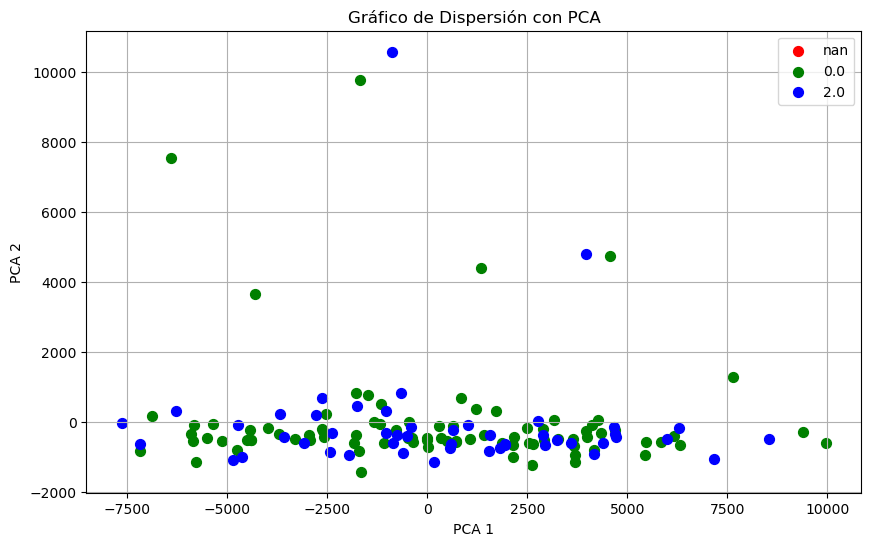

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PCA1    260 non-null    float64
 1   PCA2    260 non-null    float64
 2   Status  143 non-null    float64
dtypes: float64(3)
memory usage: 6.2 KB


In [82]:
df_pca = pd.DataFrame(data=transform, columns=['PCA1', 'PCA2'])
df_pca['Status'] = Y

plt.figure(figsize=(10, 6))


plt.title('Gráfico de Dispersión con PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


etiquetas = df_pca['Status'].unique()
colores = ['r', 'g', 'b']

for etiqueta, color in zip(etiquetas, colores):
    indices = df_pca['Status'] == etiqueta
    plt.scatter(df_pca.loc[indices, 'PCA1'],
                df_pca.loc[indices, 'PCA2'],
                c=color,
                s=50,
                label=etiqueta)

plt.legend()
plt.grid()

plt.show()

df_pca.info()

## - Analice si los grupos se pueden separar dentro de ese gráfico.

Se denota que hace falta la presencia de una de las clases, es probable que este efecto sea párate de la reducción de dimensionalidad, al realizarla se pierden datos y tal vez por ese motivo ya no hay los suficientes para predecir o tal vez cometí un error en algún paso anterior.
Pero ya que los puntos están superpuestos, considero que no es posible visualizar la separación. 

## - Suba este proyecto a su propio repositorio en GitHub.
## - Documente en un README el proceso realizado en este proyecto.
## - Brinde el enlace al entregar el proyecto en Teams.